In [166]:
import pandas as pd
import math
from scipy.stats import linregress, t
import numpy as np
import matplotlib.pyplot as plt

# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

file_name = r'/Users/dobby/Downloads/회귀분석-밀양나노 대영 폼 태화.xlsx'
df = pd.read_excel(file_name)

linear = pd.DataFrame()
linear['장약량'] = df['장약량\n(kg)'].apply(lambda x: round(x, 3)).dropna()
linear['거리'] = df['거리\n(m)'].apply(lambda x: round(x, 3)).dropna()
linear['PPV'] = df['P.P.V'].dropna()
linear['SRSD'] = (linear['거리'] / (linear['장약량']) ** 0.5).apply(lambda x: round(x, 3)).dropna()
linear['LogPPV'] = np.log10(linear['PPV']).apply(lambda x: round(x, 3)).dropna()
linear['LogSRSD'] = np.log10(linear['SRSD']).apply(lambda x: round(x, 3)).dropna()



# regerssionTableMax

linear

Matplotlib is building the font cache; this may take a moment.


,장약량,거리,PPV,SRSD,LogPPV,LogSRSD
0,2.000,10.000,4.3050,7.071,0.634,0.849
1,2.000,10.000,4.6990,7.071,0.672,0.849
2,1.375,12.000,2.0320,10.234,0.308,1.010
3,1.375,12.000,2.4380,10.234,0.387,1.010
4,1.000,14.000,1.0540,14.000,0.023,1.146
5,0.375,14.000,0.4318,22.862,-0.365,1.359
6,1.000,16.000,1.1180,16.000,0.048,1.204
7,0.375,16.000,0.2921,26.128,-0.534,1.417
8,2.000,19.000,2.0150,13.435,0.304,1.128
9,2.000,19.000,1.8380,13.435,0.264,1.128


In [167]:

def getFreedom(percent: int, dataLen: int = len(linear)):
    p_value = (100 - percent) * 2 / 100

    if dataLen > 30:
        degrees_of_freedom = 10000000
    else:
        degrees_of_freedom = dataLen - 2
    
    tinv_value = t.ppf(1 - p_value / 2, degrees_of_freedom)
    
    return round(tinv_value, 3)

x = linear['LogSRSD'].to_numpy()  
y = linear['LogPPV'].to_numpy()  

# 선형 회귀 분석 수행
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# 예측값 계산
y_pred = intercept + slope * x

# 표준 오차 계산
standard_error = np.sqrt(np.sum((y - y_pred) ** 2) / (len(y) - 2))

# 소수점 3자리로 반올림
rounded_standard_error = round(standard_error, 3)

rounded_slope = round(slope, 3)

K50 = round(10 ** intercept, 3)

T84 = getFreedom(84)
K84 = round(K50 * 10 ** (T84 * rounded_standard_error), 2)

T95 = getFreedom(95)
K95 = round(K50 * 10 ** (T95 * rounded_standard_error), 2)

rounded_slope


np.float64(-1.719)

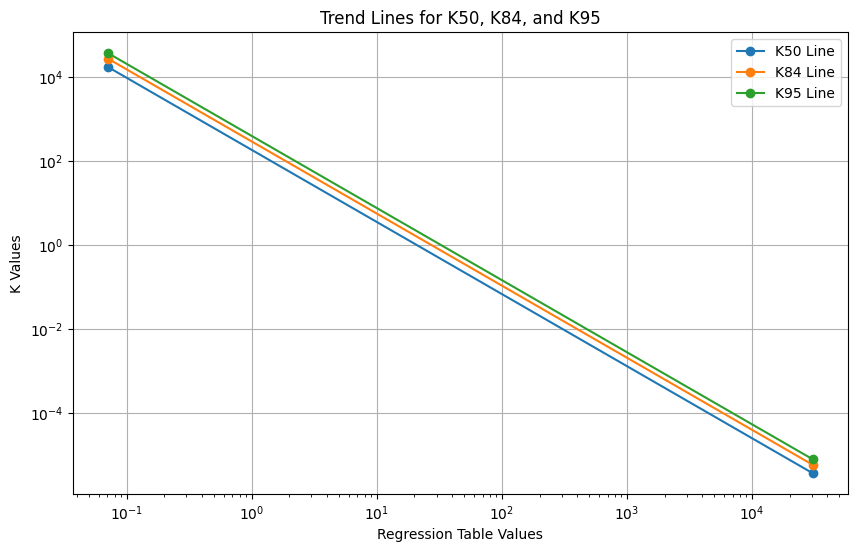

In [168]:
regerssionTableMin = float(linear['SRSD'].min() * 0.01)
regerssionTableMax = float(linear['SRSD'].max() * 100)

K50Line = [K50 * ((regerssionTableMin) ** rounded_slope), K50 * ((regerssionTableMax) ** rounded_slope)]
K84Line = [K84 * ((regerssionTableMin) ** rounded_slope), K84 * ((regerssionTableMax) ** rounded_slope)]
K95Line = [K95 * ((regerssionTableMin) ** rounded_slope), K95 * ((regerssionTableMax) ** rounded_slope)]

x_values=[regerssionTableMin, regerssionTableMax]

plt.figure(figsize=(10, 6))

plt.plot(x_values, K50Line, label='K50 Line', marker='o')
plt.plot(x_values, K84Line, label='K84 Line', marker='o')
plt.plot(x_values, K95Line, label='K95 Line', marker='o')

plt.xlabel('Regression Table Values')
plt.ylabel('K Values')
plt.title('Trend Lines for K50, K84, and K95')
plt.legend()
plt.grid(True)

plt.xscale('log')  # x축 로그 스케일
plt.yscale('log')  # y축 로그 스케일

plt.show()
